# Importation and fonction to initiat

In [14]:
import pandas as pd
import numpy as np
import fastf1
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [15]:
df = pd.read_csv('/home/riccardo/Documents/F1/dataset/dataset_plus_strait_lines_win.csv')
df = df.drop('Unnamed: 0',axis=1)

In [16]:
def plot_training_history(history):
    # Extraire les valeurs de loss et d'accuracy
    history_dict = history.history
    loss_values = history_dict.get("loss")
    val_loss_values = history_dict.get("val_loss")
    acc_values = history_dict.get("accuracy")
    val_acc_values = history_dict.get("val_accuracy")
    
    epochs = range(1, len(loss_values) + 1)

    # Graphique de la perte (loss)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, "bo", label="Training loss")
    plt.plot(epochs, val_loss_values, "b", label="Validation loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Graphique de l'exactitude (accuracy)
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc_values, "bo", label="Training accuracy")
    plt.plot(epochs, val_acc_values, "b", label="Validation accuracy")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Perceptron 64-32-1

In [ ]:
# Préparation des données
features = df[['X', 'Y', 'Angle', 'Straight_Line', 'Speed']].fillna(0)  # Remplir les NaN avec 0 ou une autre valeur
target = df['WIN']

In [5]:
# Normaliser les features
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [6]:
# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [15]:
# Construction du modèle
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Activation sigmoïde pour la classification binaire
])

In [16]:
# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
22/22 [==============================] - 1s 9ms/step - loss: -1.1199 - accuracy: 0.8381 - val_loss: -3.3847 - val_accuracy: 0.8693
Epoch 2/10
22/22 [==============================] - 0s 3ms/step - loss: -4.0455 - accuracy: 0.8679 - val_loss: -8.5305 - val_accuracy: 0.8693
Epoch 3/10
22/22 [==============================] - 0s 3ms/step - loss: -8.5822 - accuracy: 0.8679 - val_loss: -16.0235 - val_accuracy: 0.8693
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: -15.0911 - accuracy: 0.8679 - val_loss: -27.4319 - val_accuracy: 0.8693
Epoch 5/10
22/22 [==============================] - 0s 3ms/step - loss: -24.7239 - accuracy: 0.8679 - val_loss: -44.5692 - val_accuracy: 0.8693
Epoch 6/10
22/22 [==============================] - 0s 3ms/step - loss: -39.9171 - accuracy: 0.8679 - val_loss: -67.5307 - val_accuracy: 0.8693
Epoch 7/10
22/22 [==============================] - 0s 3ms/step - loss: -60.1224 - accuracy: 0.8679 - val_loss: -101.6196 - val_accuracy: 0.8

In [10]:
# Évaluation du modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: -287.5243 - accuracy: 0.8455
Accuracy: 84.55%


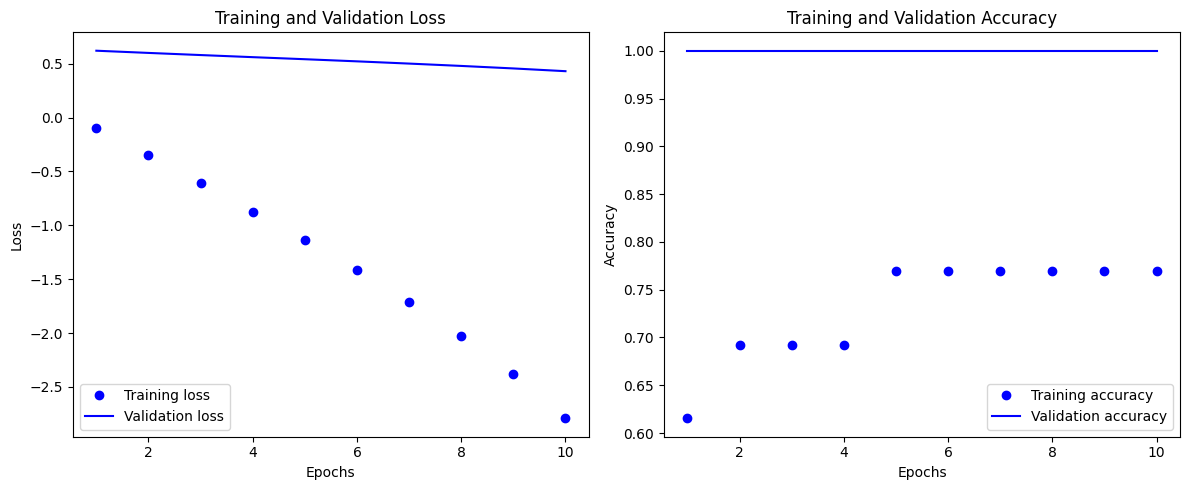

In [31]:
plot_training_history(history)

# LSTM

In [67]:
# Préparation des données
# Suppose each Grand Prix is split into 50 sections and grouped accordingly
grouped = df.groupby('Grand Prix')
circuit_data = []
labels = []

In [68]:
for name, group in grouped:
    if len(group) == 50:  # Ensure each circuit has exactly 50 sections
        features = group[['X', 'Y', 'Angle', 'Straight_Line', 'Speed']].fillna(0).values
        circuit_data.append(features)
        labels.append(group['WIN'].iloc[0])  # Use the same label for all sections of the circuit


In [73]:
# Convert to numpy arrays
circuit_data = np.array(circuit_data)
labels = np.array(labels)
circuit_data.shape

(22, 50, 5)

In [70]:
# Normaliser les features
scaler = StandardScaler()
circuit_data = circuit_data.reshape(-1, 5)  # Flatten for scaling
circuit_data.shape

(1100, 5)

In [71]:
circuit_data = scaler.fit_transform(circuit_data)
circuit_data.shape

(1100, 5)

In [72]:
circuit_data = circuit_data.reshape(-1, 50, 5)  # Reshape back to original shape
circuit_data.shape

(22, 50, 5)

In [17]:
# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(circuit_data, labels, test_size=0.2, random_state=42)

In [18]:

# Construction du modèle LSTM
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(50, 5)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid pour la classification binaire
])

In [19]:
# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.3109 - accuracy: 0.7692 - val_loss: 0.6427 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 50ms/step - loss: 0.0377 - accuracy: 0.7692 - val_loss: 0.6269 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 42ms/step - loss: -0.2231 - accuracy: 0.7692 - val_loss: 0.6109 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 50ms/step - loss: -0.4779 - accuracy: 0.7692 - val_loss: 0.5946 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 51ms/step - loss: -0.7373 - accuracy: 0.7692 - val_loss: 0.5771 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 52ms/step - loss: -1.0308 - accuracy: 0.7692 - val_loss: 0.5576 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 38ms/step - loss: -1.3594 - accuracy: 0.7692 - val_loss: 0.5360 - val_accuracy: 1.0000
Epoch 8/10
1/1 [========

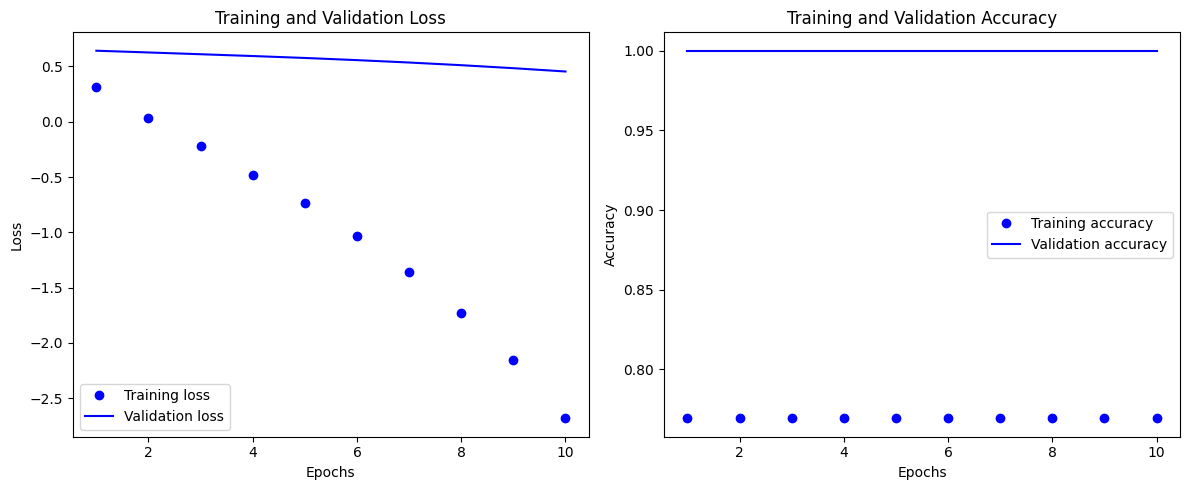

In [21]:
plot_training_history(history)

In [90]:
test = df.loc[df['Grand Prix'] == 'Bahrain Grand Prix'].drop(['Grand Prix','WIN'],axis=1)
test = np.array(test.fillna(0))

test = test.reshape(-1, 5)  # Flatten for scaling

test = scaler.fit_transform(test)

test = test.reshape(-1, 50, 5)  # Reshape back to original shape

prediction = model.predict(test)
print(prediction)

1/1 [==============================] - 0s 58ms/step
[[0.62941]]


# 50 sections training 

In [6]:
# Préparation des données
# Grouper par Grand Prix et assurer 50 sections par circuit
grouped = df.groupby('Grand Prix')
circuit_data = []
labels = []

In [7]:
for name, group in grouped:
    if len(group) == 50:  # Assurez-vous que chaque circuit a exactement 50 sections
        features = group[['X', 'Y', 'Angle', 'Straight_Line', 'Speed']].fillna(0).values
        circuit_data.append(features)
        labels.append(group['WIN'].iloc[0])  # Le numéro du pilote gagnant

# Convertir en numpy arrays
circuit_data = np.array(circuit_data)
labels = np.array(labels)

In [8]:
# Encodage des cibles
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [9]:
# Normaliser les features
scaler = StandardScaler()
circuit_data = circuit_data.reshape(-1, 5)  # Flatten for scaling
circuit_data = scaler.fit_transform(circuit_data)
circuit_data = circuit_data.reshape(-1, 50, 5)  # Reshape back to original shape

In [10]:
# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(circuit_data, labels_encoded, test_size=0.2, random_state=42)

In [11]:
# Construction du modèle LSTM
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(50, 5)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')  # Softmax pour multi-classes
])

In [12]:
# Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 1.0314 - accuracy: 0.7692 - val_loss: 0.9556 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 49ms/step - loss: 1.0064 - accuracy: 0.7692 - val_loss: 0.9199 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 56ms/step - loss: 0.9796 - accuracy: 0.7692 - val_loss: 0.8814 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 54ms/step - loss: 0.9517 - accuracy: 0.7692 - val_loss: 0.8391 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 62ms/step - loss: 0.9213 - accuracy: 0.7692 - val_loss: 0.7916 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 59ms/step - loss: 0.8879 - accuracy: 0.7692 - val_loss: 0.7369 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 54ms/step - loss: 0.8508 - accuracy: 0.7692 - val_loss: 0.6735 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=============

1/1 [==============================] - 0s 39ms/step - loss: 0.5195 - accuracy: 1.0000
Accuracy: 100.00%


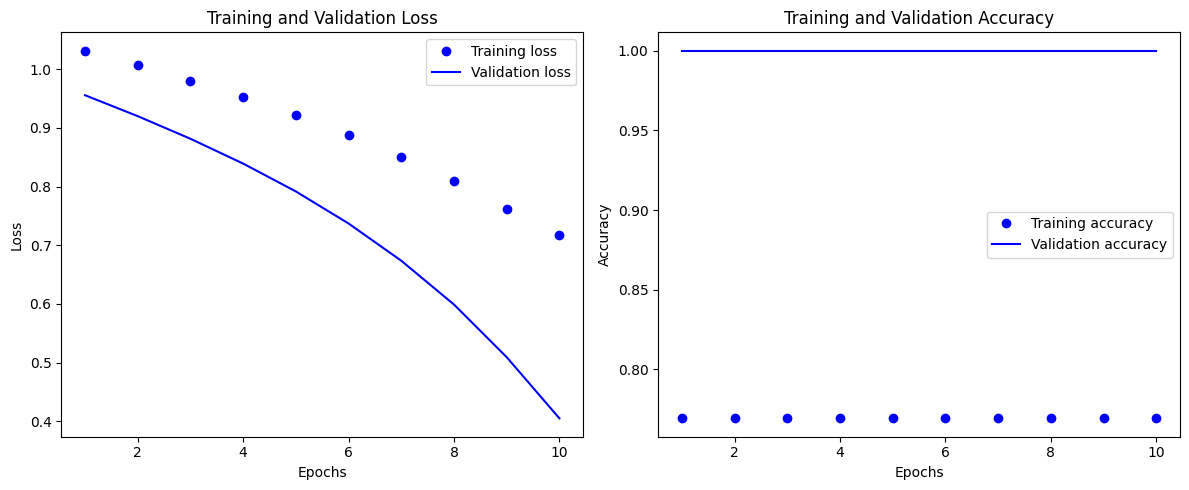

In [13]:
# Évaluation du modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Visualisation des performances
plot_training_history(history)

# Prep dataset

In [17]:
import fastf1

# Activer le cache pour éviter le rechargement des données à chaque exécution

# Obtenez la liste unique des Grand Prix dans votre DataFrame
grand_prix_list = df['Grand Prix'].unique()

# Dictionnaire pour stocker les sessions chargées
sessions_dict = {}

# Parcourez chaque Grand Prix et chargez la session de course
for gp_name in grand_prix_list:
    try:
        session = fastf1.get_session(2023, gp_name, 'R')
        session.load()  # Chargez les données de session
        sessions_dict[gp_name] = session  # Stockez la session chargée
        print(f"Session chargée pour {gp_name}")
    except Exception as e:
        print(f"Échec du chargement de la session pour {gp_name} : {e}")

# Affichez les sessions chargées pour vérifier leur récupération
print(sessions_dict.keys())


req         WARNING 	DEFAULT CACHE ENABLED! (2.76 GB) /home/riccardo/.cache/fastf1
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '

Session chargée pour Bahrain Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '1', '14', '63', '44', '55', '16', '31', '10', '20', '22', '27', '24', '21', '81', '2', '4', '77', '23', '18']
core           INFO 	Loading data for Australian Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Session chargée pour Saudi Arabian Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '14', '18', '11', '4', '27', '81', '24', '22', '77', '55', '10', '31', '21', '2', '20', '63', '23', '16']
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Session chargée pour Australian Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '1', '16', '14', '55', '44', '18', '63', '4', '22', '81', '23', '20', '10', '31', '2', '27', '77', '24', '21']
core           INFO 	Loading data for Miami Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Session chargée pour Azerbaijan Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '63', '55', '44', '16', '10', '31', '20', '22', '18', '77', '23', '27', '24', '4', '21', '81', '2']
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Session chargée pour Miami Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Session chargée pour Monaco Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '11', '55', '18', '14', '31', '24', '10', '16', '22', '81', '21', '27', '23', '4', '20', '77', '2']
core           INFO 	Loading data for Canadian Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Session chargée pour Spanish Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '44', '16', '55', '11', '23', '31', '18', '77', '81', '10', '4', '22', '27', '24', '20', '21', '63', '2']
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Session chargée pour Canadian Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '4', '14', '55', '63', '44', '18', '10', '23', '24', '2', '31', '77', '81', '21', '20', '22', '27']
core           INFO 	Loading data for British Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Session chargée pour Austrian Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '81', '63', '11', '14', '23', '16', '55', '2', '77', '27', '18', '24', '22', '21', '10', '20', '31']
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Session chargée pour British Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '11', '44', '81', '63', '16', '55', '14', '18', '23', '77', '3', '27', '22', '24', '20', '2', '31', '10']
core           INFO 	Loading data for Belgian Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Session chargée pour Hungarian Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '44', '14', '63', '4', '31', '18', '22', '10', '77', '24', '23', '20', '3', '2', '27', '55', '81']
core           INFO 	Loading data for Dutch Grand Prix - Race [v3.4.3]


Session chargée pour Belgian Grand Prix


req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '10', '11', '55', '44', '4', '23', '81', '31', '18', '27', '40', '77', '22', '20', '63', '24', '16', '2']
core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req  

Session chargée pour Dutch Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '44', '23', '4', '14', '77', '40', '81', '2', '24', '10', '18', '27', '20', '31', '22']
core           INFO 	Loading data for Singapore Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Session chargée pour Italian Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 18
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 18)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '4', '44', '16', '1', '10', '81', '11', '40', '20', '23', '24', '27', '2', '14', '63', '77', '31', '22', '18']
core           INFO 	Loading data for Japanese Grand Prix - Race [v3.4.3]
req            INFO 	U

Session chargée pour Singapore Grand Prix


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '44', '55', '63', '14', '31', '10', '40', '22', '24', '27', '20', '23', '2', '18', '11', '77']
events      WARNING 	Correcting user input 'Qatar Grand Prix' to 'Qatar Grand Prix'
core           INFO 	Loading data for Qatar Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Session chargée pour Japanese Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 55
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 55)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '4', '63', '16', '14', '31', '77', '24', '11', '18', '10', '23', '20', '22', '27', '40', '2', '44', '55']
events      WARNING 	Correcting user input 'United States Grand Prix' to 'United States Grand Pr

Session chargée pour Qatar Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '55', '11', '63', '10', '18', '22', '23', '2', '27', '77', '24', '20', '3', '14', '81', '31', '44', '16']
core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Session chargée pour United States Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '16', '55', '4', '63', '3', '81', '23', '31', '10', '22', '27', '24', '77', '2', '18', '14', '20', '11']
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Session chargée pour Mexico City Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '14', '11', '18', '55', '10', '44', '22', '31', '2', '27', '3', '81', '63', '77', '24', '20', '23', '16']
core           INFO 	Loading data for Las Vegas Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_da

Session chargée pour São Paulo Grand Prix


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '31', '18', '55', '44', '63', '14', '81', '10', '23', '20', '3', '24', '2', '77', '22', '27', '4']
core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Session chargée pour Las Vegas Grand Prix


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '11', '4', '81', '14', '22', '44', '18', '3', '31', '10', '23', '27', '2', '24', '55', '77', '20']


Session chargée pour Abu Dhabi Grand Prix
dict_keys(['Bahrain Grand Prix', 'Saudi Arabian Grand Prix', 'Australian Grand Prix', 'Azerbaijan Grand Prix', 'Miami Grand Prix', 'Monaco Grand Prix', 'Spanish Grand Prix', 'Canadian Grand Prix', 'Austrian Grand Prix', 'British Grand Prix', 'Hungarian Grand Prix', 'Belgian Grand Prix', 'Dutch Grand Prix', 'Italian Grand Prix', 'Singapore Grand Prix', 'Japanese Grand Prix', 'Qatar Grand Prix', 'United States Grand Prix', 'Mexico City Grand Prix', 'São Paulo Grand Prix', 'Las Vegas Grand Prix', 'Abu Dhabi Grand Prix'])


In [28]:
# Initialiser une colonne pour le meilleur pilote de chaque section
df['Best_Driver'] = ''

import warnings

# Ignorer les avertissements de type FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Parcourir chaque Grand Prix
for gp_name in grand_prix_list[:2]:
    print(f"Traitement du Grand Prix : {gp_name}")
    # Obtenir la session correspondante
    session = sessions_dict[gp_name]
    
    # Obtenir la liste des pilotes participants
    drivers = session.drivers
    laps = session.laps
    
    # Filtrer le DataFrame pour le Grand Prix en cours
    df_gp = df[df['Grand Prix'] == gp_name].reset_index(drop=True)
    
    # Nombre de sections (doit être 50)
    n_sections = len(df_gp)
    
    # Initialiser une liste pour stocker le meilleur pilote de chaque section
    best_drivers_sections = []
    
    # Pour chaque section
    for section_idx in range(n_sections):
        # Obtenir les coordonnées de la section
        section = df_gp.iloc[section_idx]
        section_x = section['X']
        section_y = section['Y']
        
        # Stocker les vitesses moyennes des pilotes dans cette section
        avg_speeds = {}
        
        # Pour chaque pilote
        for drv in drivers:
            # Obtenir les tours complets du pilote
            driver_laps = laps.pick_drivers(drv).pick_fastest()
            
            # Vérifier que driver_laps n'est pas None et qu'il contient des données valides
            if driver_laps is None or driver_laps.empty:
                continue
            
            # Obtenir les données de position et de vitesse du pilote
            try:
                pos_data = driver_laps.get_pos_data()
                car_data = driver_laps.get_car_data().add_distance()
                telemetry = pos_data.join(car_data['Speed'], how='inner')  # Fusionner par index
            except KeyError:
                continue
            
            # Calculer la distance entre la position de la télémétrie et la section
            telemetry['Distance_to_Section'] = np.sqrt(
                (telemetry['X'] - section_x) ** 2 + (telemetry['Y'] - section_y) ** 2
            )
            
            # Définir un seuil pour considérer que la télémétrie est dans la section
            threshold = 5
            
            # Filtrer les données proches de la section
            section_telemetry = telemetry[telemetry['Distance_to_Section'] <= threshold]
            
            # Vérifier si nous avons des données pour cette section
            if not section_telemetry.empty:
                # Calculer la vitesse moyenne dans la section
                avg_speed = section_telemetry['Speed'].mean()
                avg_speeds[drv] = avg_speed
            else:
                continue
        
        if avg_speeds:
            # Trouver le pilote avec la vitesse moyenne la plus élevée
            best_driver = max(avg_speeds, key=avg_speeds.get)
        else:
            best_driver = 'Inconnu'
        
        # Ajouter le meilleur pilote pour cette section
        best_drivers_sections.append(best_driver)
    
    # Mettre à jour le DataFrame pour ce Grand Prix
    df.loc[df['Grand Prix'] == gp_name, 'Best_Driver'] = best_drivers_sections


Traitement du Grand Prix : Bahrain Grand Prix
Traitement du Grand Prix : Saudi Arabian Grand Prix


In [29]:
df[:100]

,X,Y,Angle,Grand Prix,Straight_Line,Speed,WIN,Best_Driver
0,-1352.045659,-423.443663,NaN,Bahrain Grand Prix,6297.0,285.0,1,Inconnu
1,-3050.629355,-407.713797,NaN,Bahrain Grand Prix,6297.0,296.0,1,Inconnu
2,-4287.551593,-402.878816,NaN,Bahrain Grand Prix,6297.0,302.0,1,Inconnu
3,-6304.661766,-406.277016,NaN,Bahrain Grand Prix,6297.0,305.0,1,Inconnu
4,-7830.512652,-408.529816,NaN,Bahrain Grand Prix,6297.0,145.0,1,Inconnu
...,...,...,...,...,...,...,...,...
95,5263.599352,1292.781055,22.22,Saudi Arabian Grand Prix,NaN,104.0,11,Inconnu
96,4750.549619,1155.587867,NaN,Saudi Arabian Grand Prix,4873.0,148.0,11,Inconnu
97,3737.167686,664.851626,NaN,Saudi Arabian Grand Prix,4873.0,223.0,11,Inconnu
98,2615.325865,100.695683,NaN,Saudi Arabian Grand Prix,4873.0,262.0,11,Inconnu
